# Feature Engineering Introduction

<div class="alert alert-info">

- Start with the raw data.
- Take everything you have. Cover all available information in the data with features
- Guess what the target depends on? (wear time depends on the number of trips)
- Look visually at classes/errors and make assumptions. Which ones are useful?
- Quite a few features can be harmful. Then you have to filter it out.

# car_train dataset

In [14]:
import numpy as np
import pandas as pd
pd.set_option("display.float_format", "{:,.2f}".format)
pd.set_option("display.max_columns", None)
from classes import Paths
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
sns.set_theme(style="whitegrid")

In [15]:
paths = Paths()
train = pd.read_csv(paths.car_train)
train.head(10)

,car_id,model,car_type,fuel_type,car_rating,year_to_start,riders,year_to_work,target_reg,target_class
0,y13744087j,Kia Rio X-line,economy,petrol,3.78,2015,76163,2021,108.53,another_bug
1,O41613818T,VW Polo VI,economy,petrol,3.90,2015,78218,2021,35.20,electro_bug
2,d-2109686j,Renault Sandero,standart,petrol,6.30,2012,23340,2017,38.62,gear_stick
3,u29695600e,Mercedes-Benz GLC,business,petrol,4.04,2011,1263,2020,30.34,engine_fuel
4,N-8915870N,Renault Sandero,standart,petrol,4.70,2012,26428,2017,30.45,engine_fuel
5,b12101843B,Skoda Rapid,economy,petrol,2.36,2013,42176,2018,50.93,engine_ignition
6,Q-9368117S,Nissan Qashqai,standart,petrol,5.32,2012,24611,2014,54.79,engine_overheat
7,O-2124190y,Tesla Model 3,premium,electro,3.90,2017,116872,2019,50.26,gear_stick
8,h16895544p,Kia Sportage,standart,petrol,3.50,2014,56384,2017,33.24,gear_stick
9,K77009462l,Smart ForFour,economy,petrol,4.56,2013,41309,2018,39.43,gear_stick


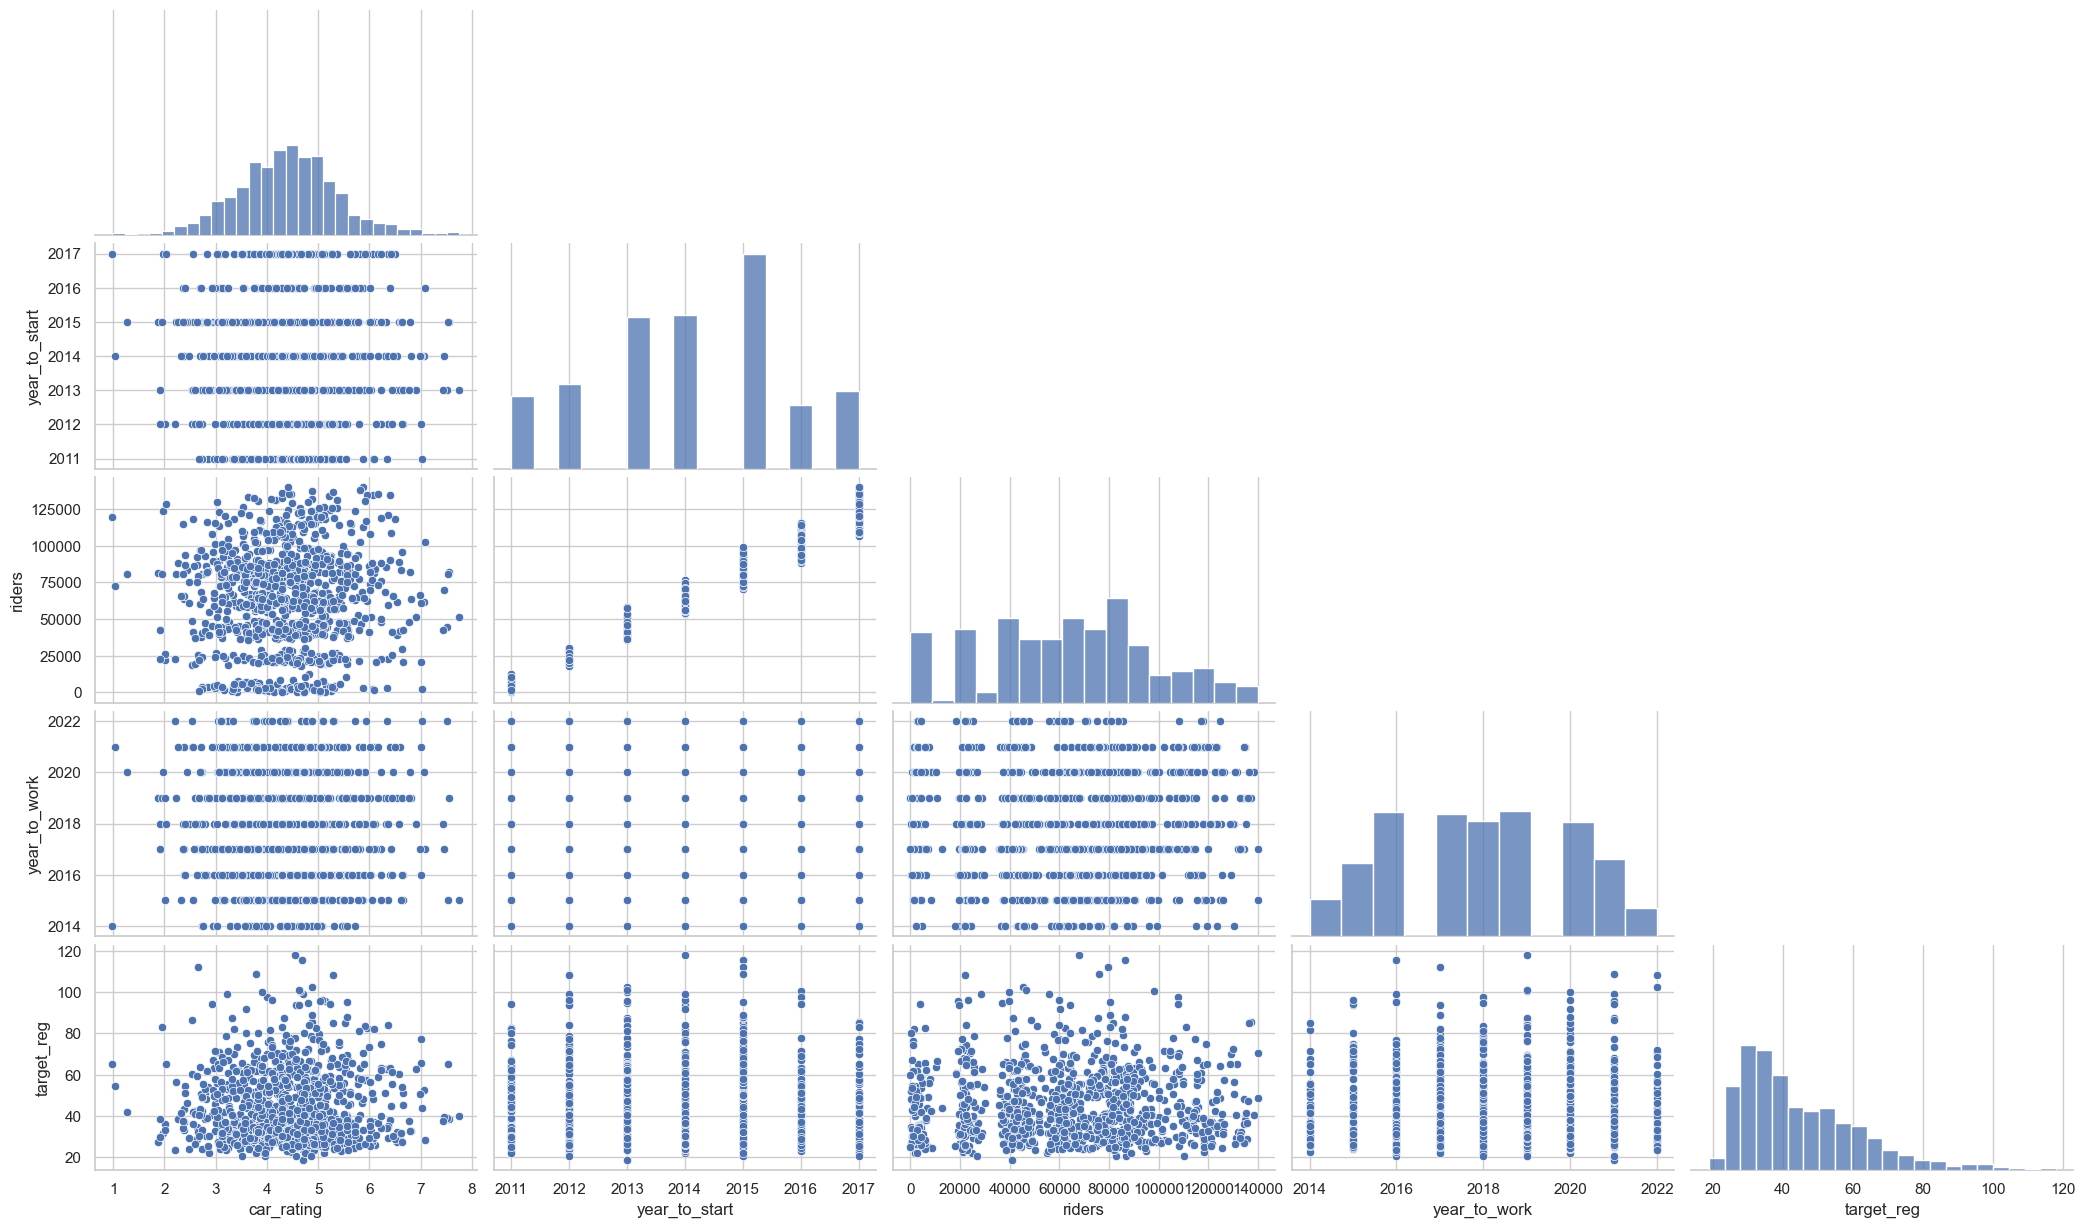

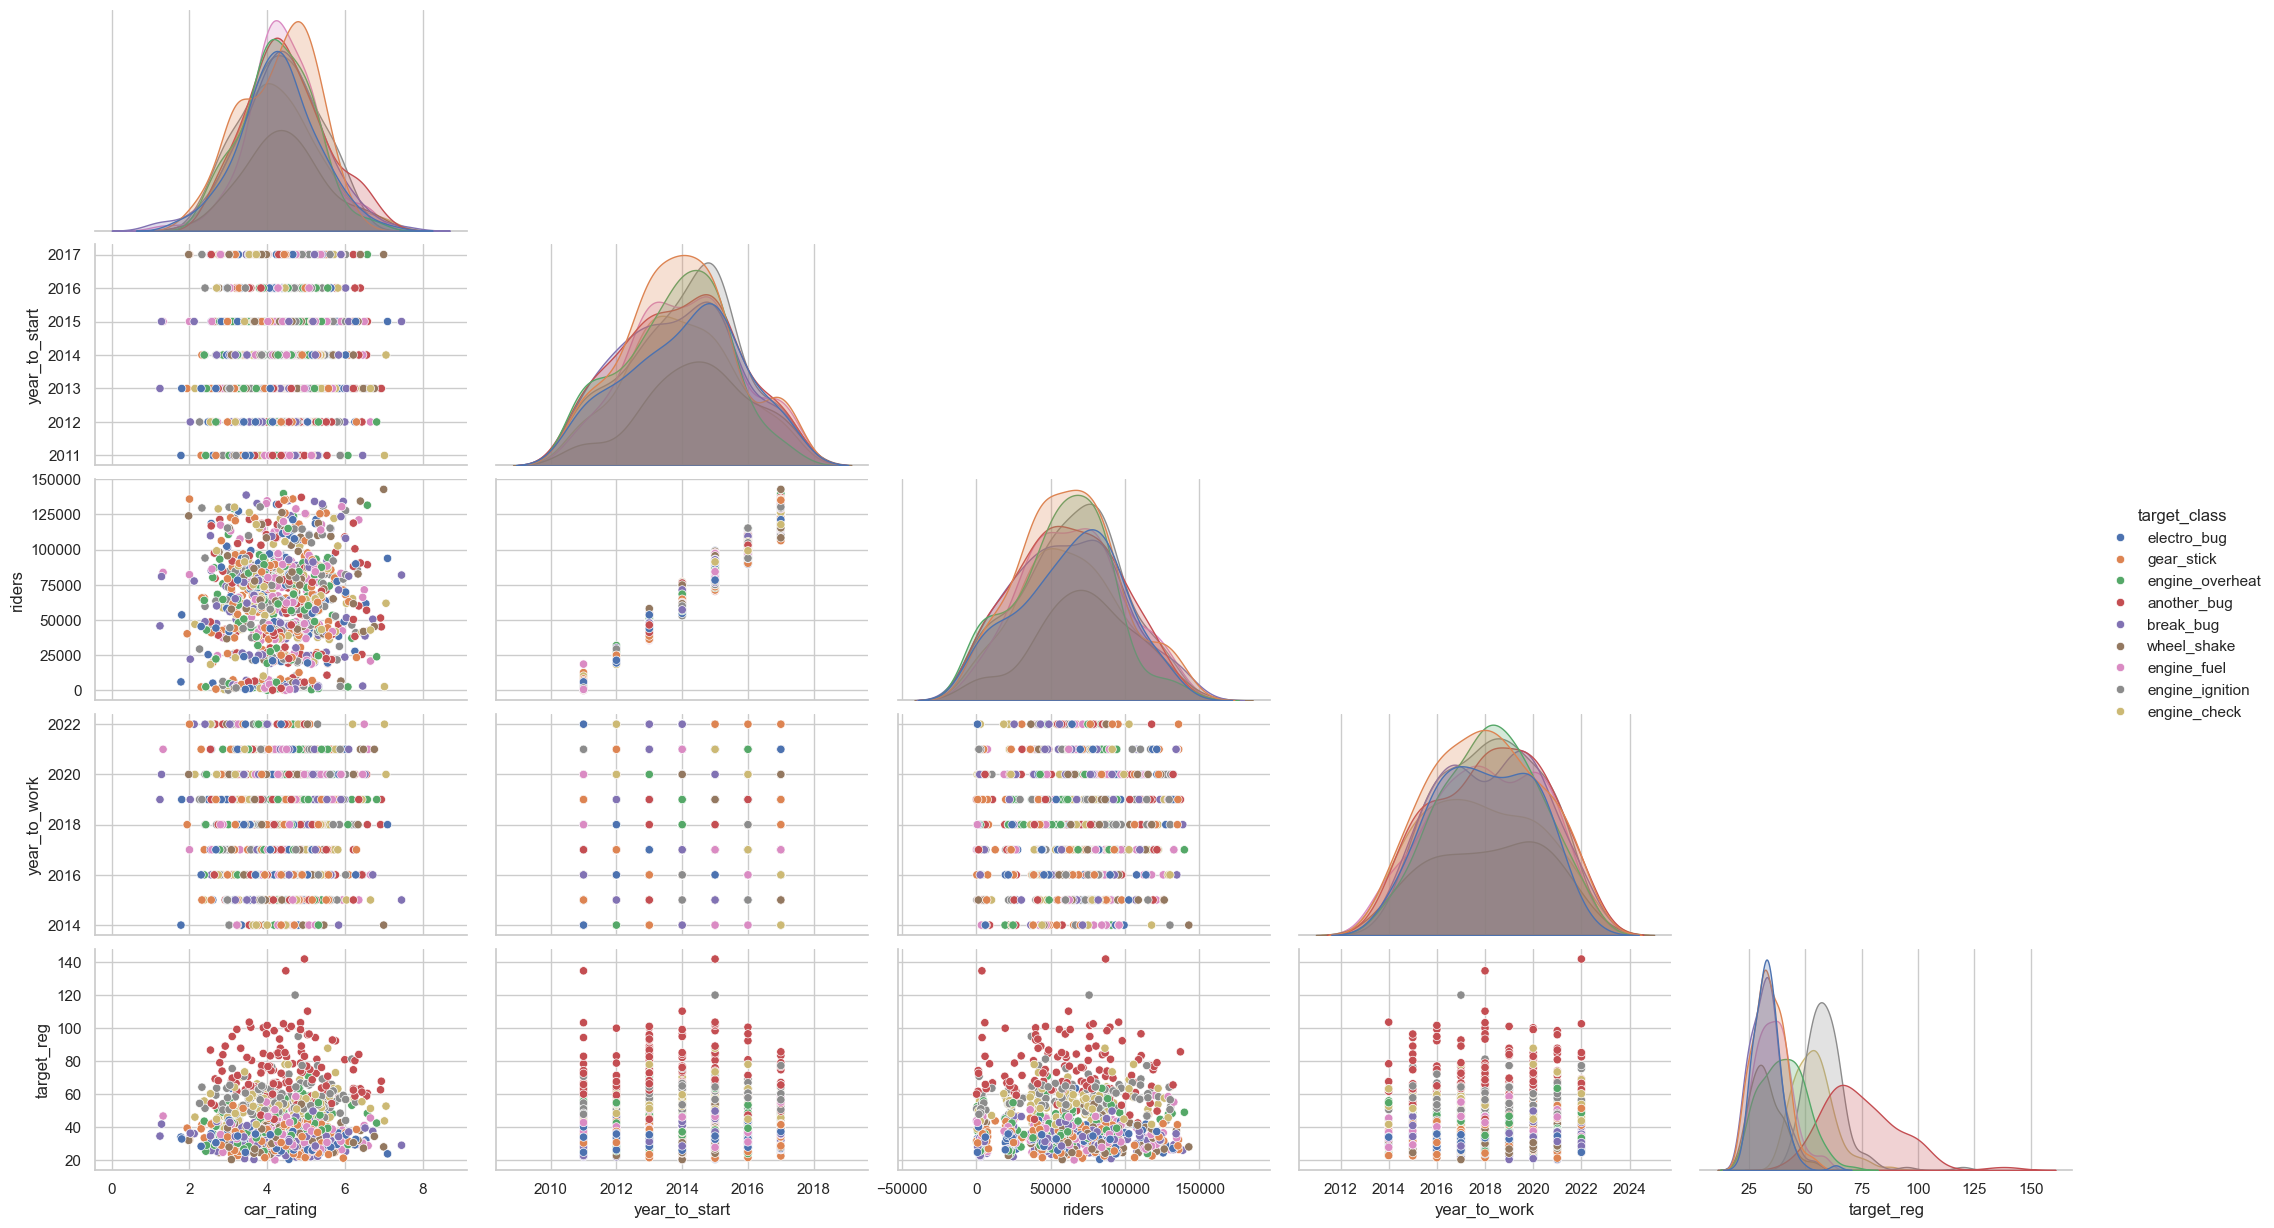

In [17]:
# train.hist(figsize=(25, 4), layout=(2, 5), bins=30);
sns.pairplot(
    train.sample(1000),
    vars=train.select_dtypes(np.number).columns,
    corner=True,
    # hue="target_class",
    aspect=1.7,
);

sns.pairplot(
    train.sample(1000),
    vars=train.select_dtypes(np.number).columns,
    corner=True,
    hue="target_class",
    aspect=1.7,
);

* `car_id` - ID of the car
* `model` / `car_type` / `fuel_type` - brand, class, and fuel type of the car
* `car_rating` / `riders` - the overall rating and the total number of rides by the end of the 2021 code.
* `year_to_start` / `year_to_work` - the year the car was built and started working in the fleet. 
* `target_reg` - the number of days before the breakdown.
* `target_class` - class of breakage (9 types in total)